In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Colection / loading and processing

In [17]:
titanic_data=pd.read_csv("/content/train.csv")

In [18]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
titanic_data.shape

(891, 12)

In [20]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [21]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:

#removing null values
titanic_data=titanic_data.drop(columns="Cabin",axis=1)

In [23]:
#replacing missing values with mean values
titanic_data["Age"].fillna(titanic_data["Age"].mean(),inplace=True)

In [24]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [25]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [26]:
# fix embarked
print(titanic_data["Embarked"].mode())

0    S
Name: Embarked, dtype: object


In [27]:
print(titanic_data["Embarked"].mode()[0])

S


In [28]:
#replace mode value with missing value
titanic_data["Embarked"].fillna(titanic_data["Embarked"].mode()[0],inplace=True)

In [29]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Analysing the data

In [30]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
#how many survived?
titanic_data["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [32]:
# visualizing data
sns.set()

<Axes: ylabel='count'>

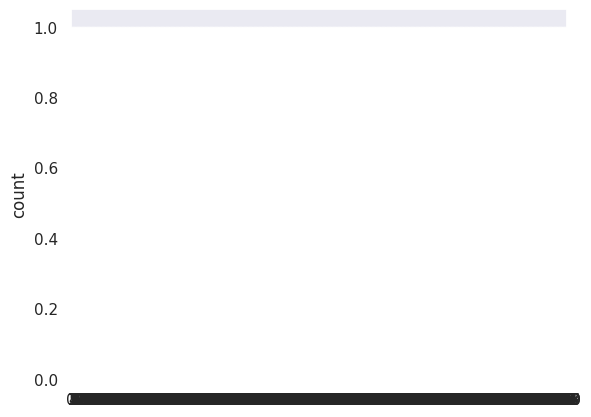

In [33]:
sns.countplot(titanic_data["Survived"])

In [34]:
titanic_data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Sex'>

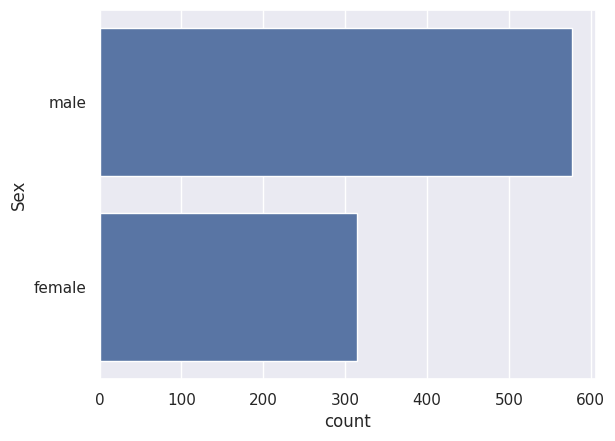

In [35]:
#count plot for sex column
sns.countplot(titanic_data["Sex"])

<Axes: xlabel='Sex', ylabel='count'>

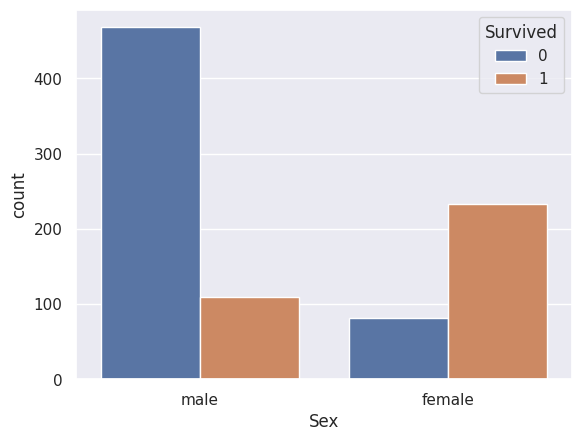

In [36]:
#Analysing gender wise surviving
sns.countplot(x="Sex",hue="Survived",data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

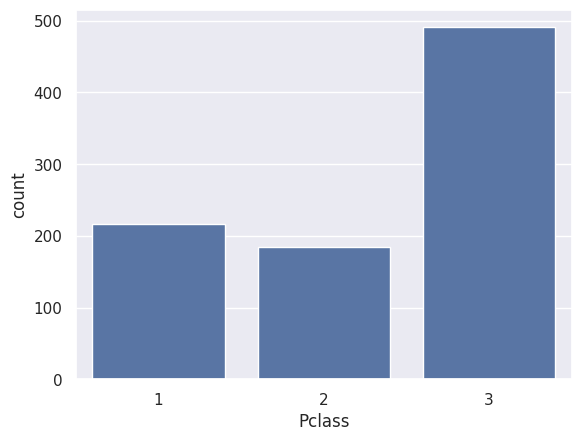

In [37]:
#count plot for Pclass column
sns.countplot(x="Pclass",data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

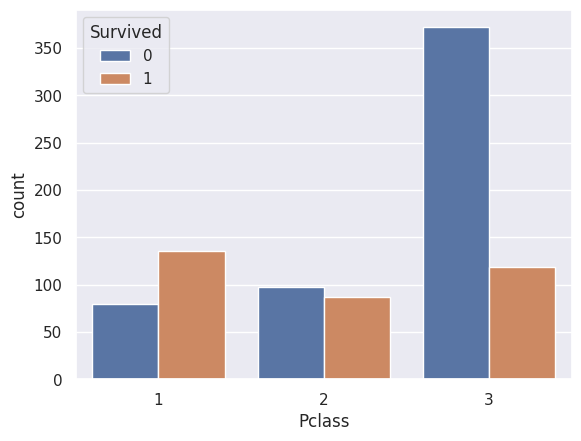

In [38]:
sns.countplot(x="Pclass",hue="Survived",data=titanic_data)

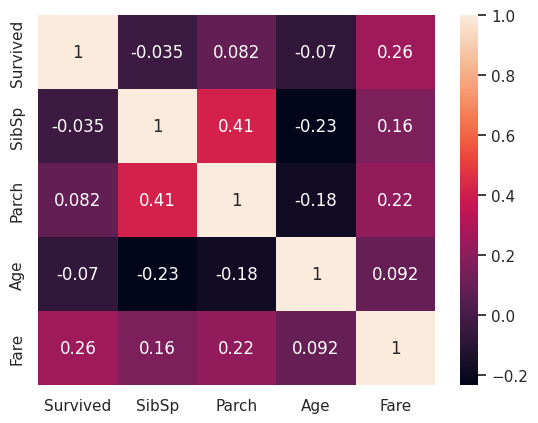

In [39]:
# Plotting heatmap
heatmap = sns.heatmap(titanic_data[["Survived", "SibSp", "Parch", "Age", "Fare"]].corr(), annot = True)
sns.set(rc={'figure.figsize':(12,10)})

Encoding categorical columns/data

In [40]:
titanic_data["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [41]:
titanic_data["Embarked"].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [42]:
titanic_data.replace({"Sex":{"male":0,"female":1},"Embarked":{"S":0,"C":1,"Q":2}},inplace=True)

In [43]:
X = titanic_data.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y = titanic_data['Survived']

In [44]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [45]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Split data into train and test data

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [47]:
print(X.shape,X_train.shape,X_test.shape)

(891, 7) (712, 7) (179, 7)


Logistic regression and model training

In [48]:
model=LogisticRegression()

In [49]:
#use the train data on logistic regression model
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [50]:
# Accuracy on training data
X_train_prediction = model.predict(X_train)

In [51]:
print(X_train_prediction)

[0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 0 1
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0
 1 1 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 

In [52]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score on training data : ', training_data_accuracy)

Accuracy score on training data :  0.8075842696629213


In [53]:
# Accuracy on test data
X_test_prediction = model.predict(X_test)

In [54]:
print(X_test_prediction)

[0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0
 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0
 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0]


In [55]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.7821229050279329


In [56]:
#ends...but
import joblib
joblib.dump(model,"logistic_model_regression.pkl")

['logistic_model_regression.pkl']

In [2]:
!pip install pyngrok

import subprocess
import os
from pyngrok import ngrok
#setup ngrok with authtoken

ngrok.set_auth_token("")

#running flask app
os.system("nohup python -m flask run -no-reload&")

#opening ngrok tunnel to the flask app using http protocol
proc=subprocess.Popen(["ngrok","http","5000"])

#retrieve ngrok's public url here
public_url=ngrok.connect(addr="5000",proto="http")
print("Public URL:",public_url)

Public URL: NgrokTunnel: "https://c626-34-83-110-147.ngrok-free.app" -> "http://localhost:5000"


In [58]:
pip install flask

In [ ]:
from flask import Flask, request, jsonify
import joblib
from pyngrok import ngrok
from IPython.display import display,HTML

#load the trained model
model=joblib.load("logistic_model_regression.pkl")

app=Flask(__name__)

@app.route("/")
def home():
  #HTML form to take inputs
  html_form = """
  <!DOCTYPE html>
  <html lang="en">
  <head>
       <meta charset="UTF-8">
       <meta name="viewport" content="width=device-width, initial-scale-1.0">
       <title>Titanic Survival Prediction</title>

  </head>
  <body>
     <h2>Titanic Survival Prediction</h2>
     <form id="predictionForm" method="post" action="/predict">
       <label for="pclass">Pclass:</label>
       <input type="text" id="pclass" name="pclass"><br><br>

       <label for="sex">Sex (0 for male, 1 for female):</label>
       <input type="text" id="sex" name="sex"><br><br>

      <label for="age">Age:</label>
      <input type="text" id="age" name="age"><br><br>

      <label for="sibsp">Sibsp:</label>
      <input type="text" id="sibsp" name="sibsp"><br><br>

      <label for="parch">arch:</label>
      <input type="text" id="parch" name="parch"><br><br>

      <label for="fare">Fare:</label>
      <input type="text" id="fare" name="fare"><br><br>

      <label for="embarked">Embarked (0 for 5, 1 for C, 2 for Q):</label>
      <input type="text" id="embarked" name="embarked"><br><br>

      <button type="button" onclick="predictSurvival()">Predict</button>

   </form>

   <p id="predictionResult"></p>

   <script>
      function predictSurvival() {
        var xhr = new XMLHttpRequest();
        var url="/predict";
        var data = new FormData(document.getElementById("predictionForm")); // Changed to FormData

        xhr.open("POST", url, true);
        xhr.onreadystatechange function () {
          if (xhr.readyState == 4 && xhr.status == 200) {
             var response = JSON.parse(xhr.responseText);
             document.getElementById("predictionResult").innerHTML= "Survival Prediction:"+ response.prediction;
        }
      };
      xhr.send(data);
    </script>
  </body>
  </html>
  """
  return html_form
@app.route('/predict', methods= ['POST'])
def predict():
  #Access form data
  pclass= request.form['pclass']
  sex = request.form['sex']
  age = request.form['age']
  sibsp= request.form[' sibsp']
  parch= request.form["parch"]
  fare = request.form[ 'fare']
  embarked= request.form['embarked']
  #Convert data to appropriate types
  pclass =int(pclass)
  sex = int(sex)
  age= float(age)
  sibsp =int(sibsp)
  parch= int(parch)
  fare= float(fare)
  embarked= int(embarked)

  #Make prediction
  features= [[pclass, sex, age, sibsp, parch, fare, embarked]]
  prediction= model.predict(features)[0]

  return jsonify({'prediction': int(prediction)})

def run_flask_app():
  #Run Flask app on port 5000
  app.run(host='127.0.0.1', port=5000, debug=True, use_reloader=False)

#Start ngrok tunnel
public_url=ngrok.connect(addr="5000", proto="http")
print("Public URL:", public_url)

# Display ngrok tunnel URL
display(HTML(f"<h2>Open this link in your browser to access the application:</h2><p>{public_url}</p>"))

try:
  #Keep the Flask app running
  run_flask_app()
except KeyboardInterrupt:
  #Shutdown ngrok and Flask app
  ngrok.kill()


Public URL: NgrokTunnel: "https://b96b-34-83-110-147.ngrok-free.app" -> "http://localhost:5000"


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
